In [56]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
#Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [59]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Tien/Train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 641 images belonging to 9 classes.


In [61]:

val_set = val_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Tien/Val', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 95 images belonging to 9 classes.


In [62]:
# Các nhãn có trong bộ dữ liệu training
training_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '20K': 4,
 '2K': 5,
 '500K': 6,
 '50K': 7,
 '5K': 8}

In [63]:
# Các nhãn có trong bộ dữ liệu test
val_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '20K': 4,
 '2K': 5,
 '500K': 6,
 '50K': 7,
 '5K': 8}

In [64]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same',input_shape=(224,224,3))) 
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                  

In [65]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [67]:

history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=val_set)

Epoch 1/100
21/21 [==============================] - 17s 799ms/step - loss: 2.0815 - accuracy: 0.1778 - val_loss: 2.1862 - val_accuracy: 0.1684
Epoch 2/100
21/21 [==============================] - 17s 797ms/step - loss: 2.0717 - accuracy: 0.1919 - val_loss: 2.1568 - val_accuracy: 0.1368
Epoch 3/100
21/21 [==============================] - 17s 791ms/step - loss: 2.0138 - accuracy: 0.2028 - val_loss: 2.2769 - val_accuracy: 0.1368
Epoch 4/100
21/21 [==============================] - 17s 791ms/step - loss: 1.9290 - accuracy: 0.2293 - val_loss: 2.2752 - val_accuracy: 0.1158
Epoch 5/100
21/21 [==============================] - 17s 792ms/step - loss: 1.9353 - accuracy: 0.2215 - val_loss: 2.2642 - val_accuracy: 0.1368
Epoch 6/100
21/21 [==============================] - 17s 791ms/step - loss: 1.9104 - accuracy: 0.2496 - val_loss: 2.3438 - val_accuracy: 0.1789
Epoch 7/100
21/21 [==============================] - 17s 789ms/step - loss: 1.8820 - accuracy: 0.2777 - val_loss: 2.3607 - val_accuracy:

In [68]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.040895912796258926
Train Accuracy 0.9875195026397705


<function matplotlib.pyplot.show(*args, **kw)>

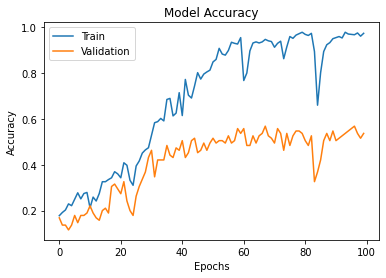

In [69]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [50]:
# Lưu lại
model.save("Money.h5")

In [51]:
# Tải mô hình 
model_CNN=load_model('Money.h5')

1/1 [==============================] - 0s 16ms/step
NAM TRAM NGAN DONG


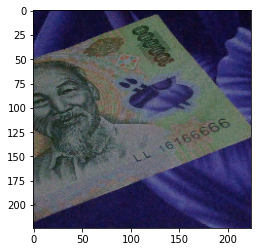

1/1 [==============================] - 0s 17ms/step
NAM TRAM NGAN DONG


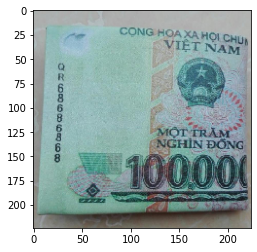

1/1 [==============================] - 0s 20ms/step
NAM NGAN DONG


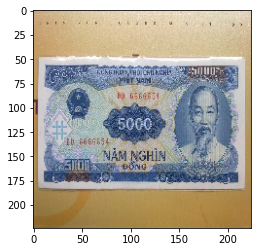

1/1 [==============================] - 0s 16ms/step
NAM NGAN DONG


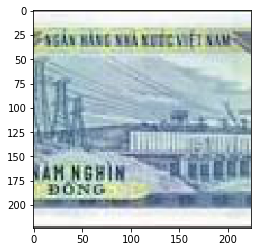

1/1 [==============================] - 0s 15ms/step
HAI NGAN DONG


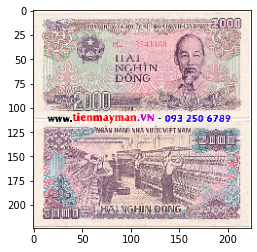

1/1 [==============================] - 0s 16ms/step
MOT NGAN DONG


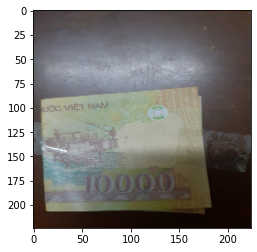

1/1 [==============================] - 0s 18ms/step
HAI TRAM NGAN DONG


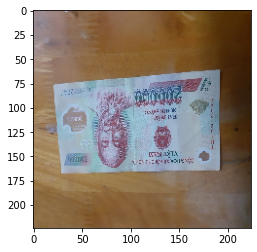

1/1 [==============================] - 0s 16ms/step
NAM NGAN DONG


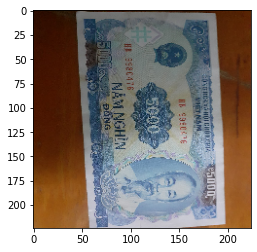

In [74]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/Tien/Test/Test 1"
import os
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(224,224))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='MOT TRAM NGAN DONG'
  if round(result[0][1])==1:
    prediction='MUOI NGAN DONG'
  if round(result[0][2])==1:
    prediction='MOT NGAN DONG'
  if round(result[0][3])==1:
    prediction='HAI TRAM NGAN DONG'
  if round(result[0][4])==1:
    prediction='HAI CHUC NGAN DONG'
  if round(result[0][5])==1:
    prediction='HAI NGAN DONG'
  if round(result[0][6])==1:
    prediction='NAM TRAM NGAN DONG'
  if round(result[0][7])==1:
    prediction='NAM CHUC NGAN DONG'
  if round(result[0][8])==1:
    prediction='NAM NGAN DONG'
  print(prediction)
  plt.show()

1/1 [==============================] - 0s 16ms/step
NAM NGAN DONG


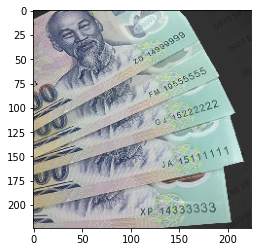

1/1 [==============================] - 0s 16ms/step
NAM NGAN DONG


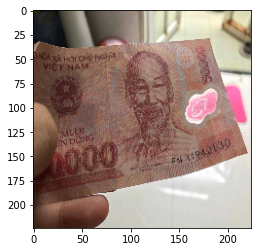

1/1 [==============================] - 0s 17ms/step
HAI CHUC NGAN DONG


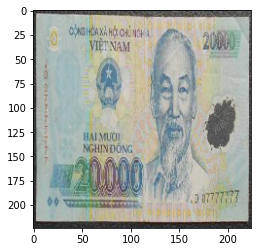

1/1 [==============================] - 0s 21ms/step
MUOI NGAN DONG


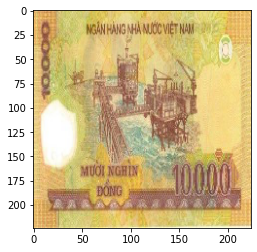

1/1 [==============================] - 0s 17ms/step
HAI NGAN DONG


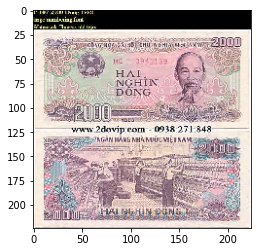

1/1 [==============================] - 0s 17ms/step
HAI TRAM NGAN DONG


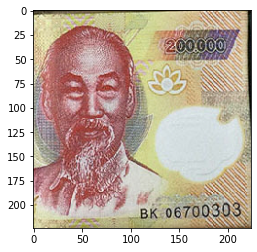

1/1 [==============================] - 0s 21ms/step
HAI CHUC NGAN DONG


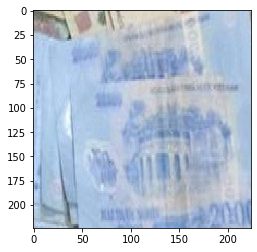

In [76]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/Tien/Test/Test 2"
import os
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(224,224))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='MOT TRAM NGAN DONG'
  if round(result[0][1])==1:
    prediction='MUOI NGAN DONG'
  if round(result[0][2])==1:
    prediction='MOT NGAN DONG'
  if round(result[0][3])==1:
    prediction='HAI TRAM NGAN DONG'
  if round(result[0][4])==1:
    prediction='HAI CHUC NGAN DONG'
  if round(result[0][5])==1:
    prediction='HAI NGAN DONG'
  if round(result[0][6])==1:
    prediction='NAM TRAM NGAN DONG'
  if round(result[0][7])==1:
    prediction='NAM CHUC NGAN DONG'
  if round(result[0][8])==1:
    prediction='NAM NGAN DONG'
  print(prediction)
  plt.show()

In [ ]:
!jupyter nbconvert --to html "/content/Nhận_diện_đồ_ăn (2).ipynb"
